# $45^\circ$ Correction Investigation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import S2P_Tools as s2p

Apparatus Measurements and Fundamental Constants

In [3]:
# Speed of light
c = 299792458

# Sample thickness
d=0.0127

#### Apply Simulation Investigation Corrections to 25A Ferrite
The big caveat is that we are now subtracting the 45 degree phase rather than adding it

07032023_Ferrite_Meas_Current/NO_SAMPLE_0A.S2P


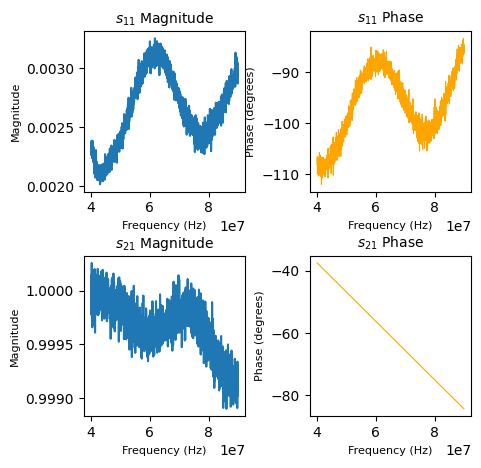

07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_AVG.S2P


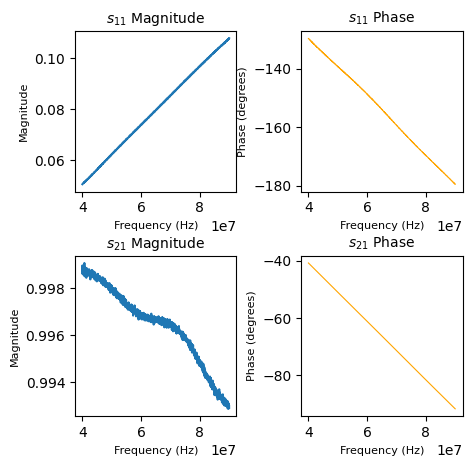

07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_AVG.S2P with All Corrections


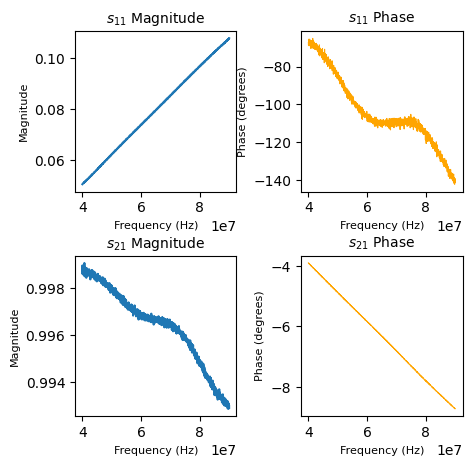

Relative permittivity:  (10.849177487583372-0.6308075930197531j)
Relative permeability:  (2.064453954561528+0.5111287140558429j)


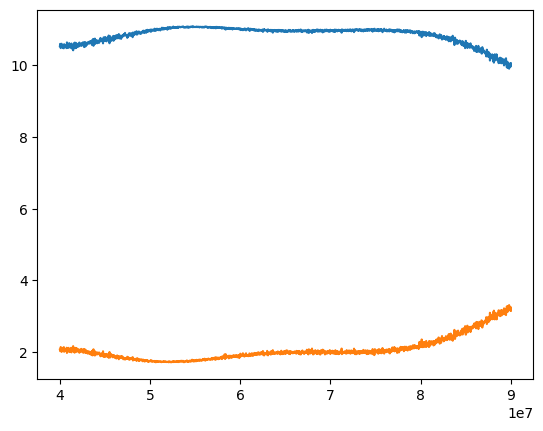

In [4]:
frequency_h, s11_mag, s11_phase_h, s21_mag, s21_phase_h = s2p.parameters(r'07032023_Ferrite_Meas_Current/NO_SAMPLE_0A.S2P', True)
#frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_DEEMBED.S2P', True)
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_AVG.S2P', True)

# Subtract 360 from the values that meet the condition
s11_phase[s11_phase > 0] -= 360
s11_phase = s11_phase - s11_phase_h
s21_phase = s21_phase - s21_phase_h

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase - phi_0
s11_phase = s11_phase - phi_0

# 45 degree correction
s11_phase  = s11_phase - 45

# Plot the data with the air sample phase correction added
s2p.plot_parameters(r'07032023_Ferrite_Meas_Current/FERRITE_SAMPLE_25A_AVG.S2P with All Corrections', frequency, s11_mag, s11_phase, s21_mag, s21_phase)

s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

# Calculate epsilon and mu
K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)
lambda_0 = c / frequency
A = -((1/(2*np.pi*d)) * np.log(1/T))**2

# Zero cut-off wavelength
mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
epsilon_r = (lambda_0**2 / mu_r ) * (A)

plt.plot(frequency, np.real(epsilon_r))
plt.plot(frequency, np.real(mu_r))
print('Relative permittivity: ', np.average(epsilon_r))
print('Relative permeability: ', np.average(mu_r))

#### $\epsilon$ and $\mu$ for Different Current Biases

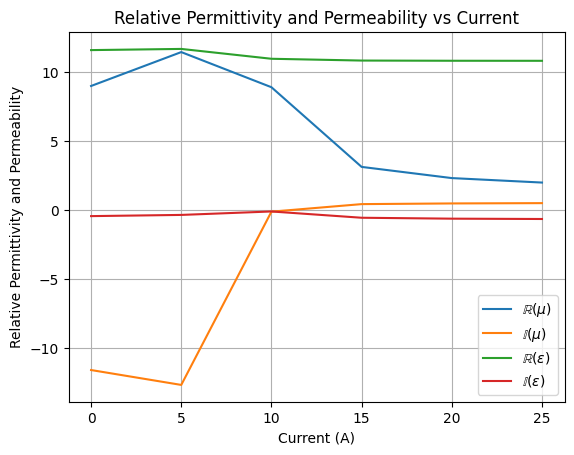

mu:  [(8.984066044199263-11.571885441085321j), (11.436904501945822-12.649088791708085j), (8.894248017920596-0.11114628898232827j), (3.128367369627126+0.43489905194087636j), (2.3190183070519823+0.4843349667713302j), (1.9955241943481037+0.5061853515705668j)]
epsilon:  [(11.58053860533761-0.43334393472468236j), (11.666008390411317-0.3465270011901657j), (10.953231590091312-0.09694392921823891j), (10.824156780551803-0.5513286473687515j), (10.809739251291521-0.6177257848216263j), (10.806097884579309-0.6416452745256588j)]


In [5]:
frequency_h, s11_mag, s11_phase_h, s21_mag, s21_phase_h = s2p.parameters(r'07032023_Ferrite_Meas_Current/NO_SAMPLE_0A.S2P')

mu_r_list = []
epsilon_r_list = []
current_list = []

for i in range(0,6):
    frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_'+str(i*5) +'A.s2p')
    
    # Subtract 360 from the values that meet the condition
    s11_phase[s11_phase > 0] -= 360
    s11_phase = s11_phase - s11_phase_h
    s21_phase = s21_phase - s21_phase_h

    # Phase correction
    lambda_0 = c / frequency
    phi_0 = 360 * d/lambda_0
    s21_phase = s21_phase - phi_0
    s11_phase = s11_phase - phi_0

    # 45 degree correction
    s11_phase  = s11_phase - 45

    s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
    s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

    # Calculate epsilon and mu
    K = (s11**2-s21**2+1)/(2*s11)

    R = np.zeros_like(K)
    mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
    R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
    R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

    T = (s11+s21-R)/(1-(s11+s21)*R)
    lambda_0 = c / frequency
    A = -((1/(2*np.pi*d)) * np.log(1/T))**2

    # Zero cut-off wavelength
    mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
    epsilon_r = (lambda_0**2 / mu_r ) * (A)
    
    mu_r_list.append(np.average(mu_r))
    epsilon_r_list.append(np.average(epsilon_r))
    current_list.append(i*5)
    
plt.title('Relative Permittivity and Permeability vs Current')
plt.plot(current_list, np.real(mu_r_list), label='$\mathbb{R}(\mu)$')
plt.plot(current_list, np.imag(mu_r_list), label='$\mathbb{I}(\mu)$')
plt.plot(current_list, np.real(epsilon_r_list), label='$\mathbb{R}(\epsilon)$')
plt.plot(current_list, np.imag(epsilon_r_list), label='$\mathbb{I}(\epsilon)$')
plt.xlabel('Current (A)')
plt.ylabel('Relative Permittivity and Permeability')
plt.legend()
plt.grid()
plt.show()

print("mu: ",mu_r_list)
print("epsilon: ",epsilon_r_list)